# Fake news Detection

### Importing required library


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import pickle

### Inserting fake and real dataset

In [60]:
df_news = pd.read_csv("dataset.csv")

In [61]:
df_news = df_news.drop("Unnamed: 0",axis=1)

In [62]:
df_news.shape

(800, 6)

In [63]:
df_news.head(20)

,title,url,timestamp,short_desc,source,target
0,Davos freezes out Putin and Russian oligarchs,https://www.politico.com/news/2022/03/08/davos...,2022-03-08 21:51:17,"World Economic Forum is siding with Ukraine, a...",Politico,0
1,Makeshift arms are pouring out of Ukraine’s at...,https://www.economist.com/science-and-technolo...,2022-03-08 22:00:00,They will make life unpleasant for the invaders,The Economist,0
2,Leaders of Self-proclaimed Separatist Republi...,https://www.stopfake.org/en/fake-leaders-of-se...,2020-12-03 21:23:00,\nRussian media featured several stories this ...,ria.ru,1
3,Senior Defense Official Holds a Background Bri...,https://www.defense.gov/News/Transcripts/Trans...,2022-03-08 21:56:27,A senior defense department official held a ba...,Department of Defense,0
4,Ukraine’s Foreign Ministry Wants to Make Peac...,https://www.stopfake.org/en/fake-ukraine-s-for...,2020-12-30 23:18:00,\nPeace with Russia is the main goal of the Uk...,ukraina.ru,1
5,"Bumble App Drops Russia, Belarus Amid Ukraine ...",https://www.newsweek.com/bumble-app-drops-russ...,2022-03-09 21:41:24,"Along with providing a dating mechanism, the a...",Newsweek,0
6,Russia's invasion of Ukraine is driving gas pr...,https://www.usatoday.com/story/money/cars/2022...,2022-02-25 21:49:51,Gas prices are rising across the U.S. followin...,USA Today,0
7,Twitter launches Tor service bypassing Russia'...,https://apnews.com/f1da10285a1631542b332597c5d...,2022-03-09 21:43:28,Twitter has launched a privacy-protected versi...,Associated Press,0
8,Dow futures fall 300 points as oil prices spik...,https://slashdot.org/firehose.pl?op=view&amp;i...,2022-03-06 21:52:57,Dow futures fall 300 points as oil prices spik...,Slashdot.org,0
9,"U.S., EU, U.K. agree to remove selected Russia...",https://www.thestar.com/news/world/2022/02/26/...,2022-02-26 21:35:32,The measures were announced jointly as part of...,Toronto Star,0


In [64]:
df = df_news.drop(["url", "timestamp","short_desc","source"], axis = 1)

In [65]:
df

,title,target
0,Davos freezes out Putin and Russian oligarchs,0
1,Makeshift arms are pouring out of Ukraine’s at...,0
2,Leaders of Self-proclaimed Separatist Republi...,1
3,Senior Defense Official Holds a Background Bri...,0
4,Ukraine’s Foreign Ministry Wants to Make Peac...,1
...,...,...
795,Thousands of Russians Urgently Leaving Ukraine,1
796,"Ukrainian cities Kharkiv, Mykolayiv and Odesa...",1
797,"Mastercard, Visa suspend operations in Russia ...",0
798,EU Proposes Sanctions on Some of Russia's Weal...,0


In [66]:
df.shape

(800, 2)

In [67]:
df.isnull().sum()

title     0
target    0
dtype: int64

#### Randomly shuffling the dataframe 

In [68]:
df = df.sample(frac = 1)

In [69]:
df.head()

,title,target
621,"Airstrike hits Ukraine maternity hospital, 17 ...",0
747,"Russian invasion drives up energy costs, and A...",0
115,Polls Show People Don’t Believe Russia Shot D...,1
74,OSCE Confirms Ukraine’s Military Violating In...,1
302,Rouble Slumps To New Low Of $132.5 As Moscow's...,0


In [70]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [71]:
df.columns

Index(['title', 'target'], dtype='object')

In [72]:
df.head()

,title,target
0,"Airstrike hits Ukraine maternity hospital, 17 ...",0
1,"Russian invasion drives up energy costs, and A...",0
2,Polls Show People Don’t Believe Russia Shot D...,1
3,OSCE Confirms Ukraine’s Military Violating In...,1
4,Rouble Slumps To New Low Of $132.5 As Moscow's...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [73]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [74]:
df["text"] = df["title"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [75]:
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

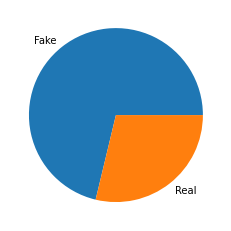

Fake :  570
Real  : 230


In [76]:

class_one = 0
class_two = 0

# for loop to itreate through the output class
for i in y:
    if i ==0:
        class_one+=1
    else:
        class_two+=1

# creating numpy arry
values = np.array([class_one, class_two])
label = ["Fake", "Real"]

# ploting the graph
plt.pie(values, labels = label)
plt.show()

# printing the results
print("Fake : ", class_one)
print("Real  :", class_two)

#### Splitting the dataset into training set and testing set. 

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [82]:
pred_lr=LR.predict(xv_test)

In [83]:
LR.score(xv_test, y_test)

0.79

In [84]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       144
           1       1.00      0.25      0.40        56

    accuracy                           0.79       200
   macro avg       0.89      0.62      0.64       200
weighted avg       0.84      0.79      0.74       200



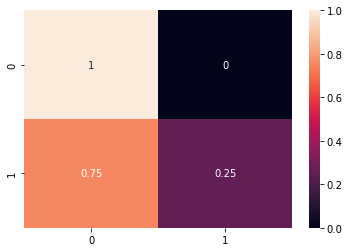

In [85]:
#Confusion Matrix also known as Error Matrix to check performannce of algorithm
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred_lr)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)
plt.show()

In [86]:
print("(Logistic Regression) Accuracy = ",metrics.accuracy_score(y_test, pred_lr)*100)

(Logistic Regression) Accuracy =  79.0


### 2. Decision Tree Classification

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [88]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [89]:
pred_dt = DT.predict(xv_test)

In [90]:
DT.score(xv_test, y_test)

0.735

In [91]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80       144
           1       0.52      0.68      0.59        56

    accuracy                           0.73       200
   macro avg       0.69      0.72      0.70       200
weighted avg       0.76      0.73      0.74       200



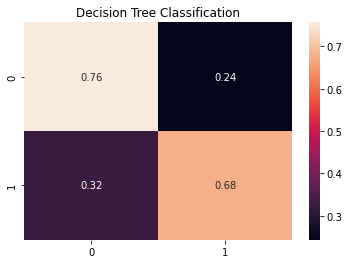

In [92]:
cm = metrics.confusion_matrix(y_test, pred_dt)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)
plt.title("Decision Tree Classification")
plt.show()

In [93]:
print("(Decision Tree Classification) Accuracy = ",metrics.accuracy_score(y_test, pred_dt)*100)

(Decision Tree Classification) Accuracy =  73.5


### 3. Gradient Boosting Classifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [95]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [96]:
pred_gbc = GBC.predict(xv_test)

In [97]:
GBC.score(xv_test, y_test)

0.79

In [98]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       144
           1       0.66      0.52      0.58        56

    accuracy                           0.79       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.78      0.79      0.78       200



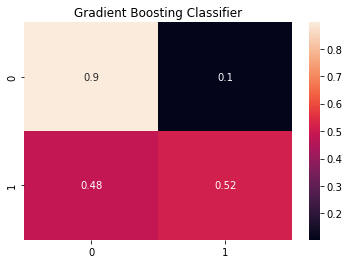

In [99]:
cm = metrics.confusion_matrix(y_test, pred_gbc)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)
plt.title("Gradient Boosting Classifier")
plt.show()

In [100]:
print("(Gradient Boosting Classifier) Accuracy = ",metrics.accuracy_score(y_test, pred_gbc)*100)

(Gradient Boosting Classifier) Accuracy =  79.0


### 4. Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [102]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [103]:
pred_rfc = RFC.predict(xv_test)

In [104]:
RFC.score(xv_test, y_test)

0.81

In [105]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       144
           1       0.68      0.61      0.64        56

    accuracy                           0.81       200
   macro avg       0.77      0.75      0.76       200
weighted avg       0.80      0.81      0.81       200



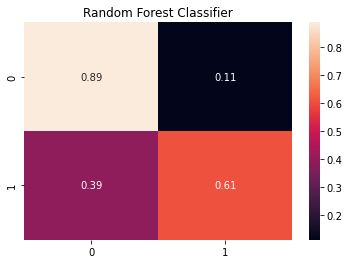

In [106]:
cm = metrics.confusion_matrix(y_test, pred_rfc)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)
plt.title("Random Forest Classifier")
plt.show()

In [107]:
print("(Random Forest Classifier) Accuracy = ",metrics.accuracy_score(y_test, pred_rfc)*100)

(Random Forest Classifier) Accuracy =  81.0


## 5. Passive Aggressive Classifier

In [108]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

In [109]:
PAC = PassiveAggressiveClassifier(random_state=0)
PAC.fit(xv_train, y_train)

PassiveAggressiveClassifier(random_state=0)

In [110]:
pred_pac = PAC.predict(xv_test)

In [111]:
PAC.score(xv_test, y_test)

0.88

In [112]:
print(classification_report(y_test, pred_pac))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       144
           1       0.85      0.70      0.76        56

    accuracy                           0.88       200
   macro avg       0.87      0.82      0.84       200
weighted avg       0.88      0.88      0.88       200



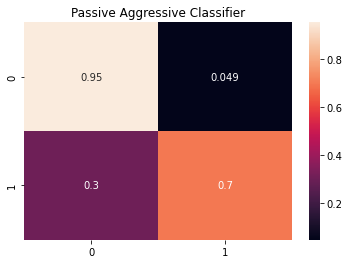

In [113]:
cm = metrics.confusion_matrix(y_test, pred_pac)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)
plt.title("Passive Aggressive Classifier")
plt.show()

In [114]:
print("(Passive Aggressive Classifier) Accuracy = ",metrics.accuracy_score(y_test, pred_pac)*100)

(Passive Aggressive Classifier) Accuracy =  88.0


# Model Testing With Manual Entry

### News

In [116]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_PAC = PAC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                             output_lable(pred_RFC[0]),
                                                                                                            output_lable(pred_PAC[0])))

In [118]:
news = str(input())
manual_testing(news)

During a November 12 online conference with Ukrainian aircraft companies, the Peruvian Ministry of Internal Affairs confirmed that its contract with Ukraine


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
PAC Prediction: Real News


In [78]:
pickle.dump(LR, open('lr.pkl','wb'))

In [77]:
pickle.dump(PAC, open('pac.pkl','wb'))